# main_example.ipynb

This jupyter notebook helps to illustrates the usage of the functions in utils.ipynb

## Library import

In [1]:
from scipy.signal import welch

%run utils.ipynb

## Data load

In [2]:
signal, time = np.load('../Demo_datasets/noised_signal.npy')

## Data plot

(0.0, 8.999933333333333)

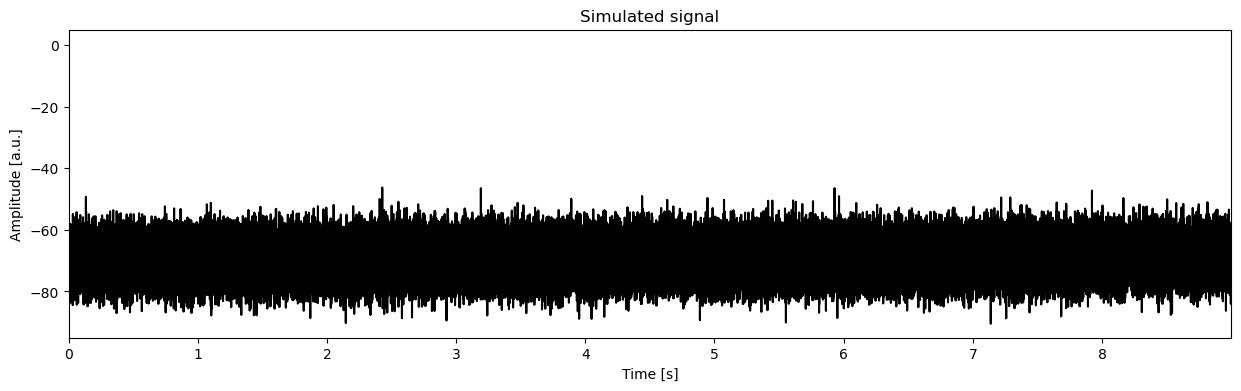

In [3]:
plt.figure(figsize = (15, 4))
plt.title("Simulated signal")
plt.plot(time, signal, 'black', 0.5)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [a.u.]")
plt.xlim(0, time[-1])

## Signal PSD

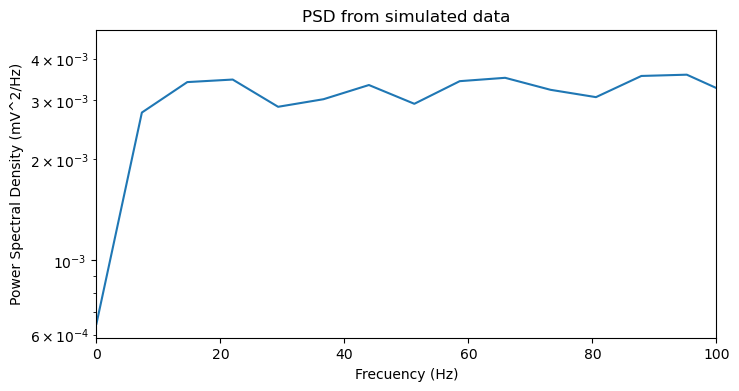

In [4]:
f, Pxx = welch(signal, fs=15000, nperseg=2048)

plt.figure(figsize=(8, 4))
plt.semilogy(f, Pxx)
plt.xlim([0, 100]) 
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Power Spectral Density (mV^2/Hz)')
plt.title('PSD from simulated data')
plt.show()

## Wavelet transform computation

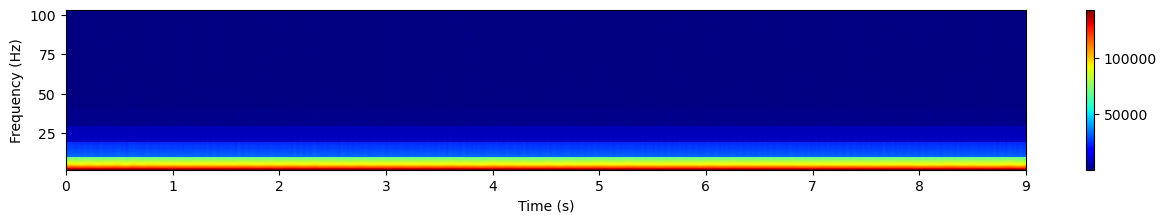

In [5]:
M_freq, time, freqs = CWT(signal, sf=15000, BW=[2, 100], Nwvlts=60, plot = True);

## Normalizing the Wavelets' PSD

In [6]:
M_norm = z_norm(M_freq)

In [7]:
M_freq.shape, time.shape, freqs.shape, M_norm.shape

((60, 135000), (135000,), (60,), (60, 135000))

## Plot results

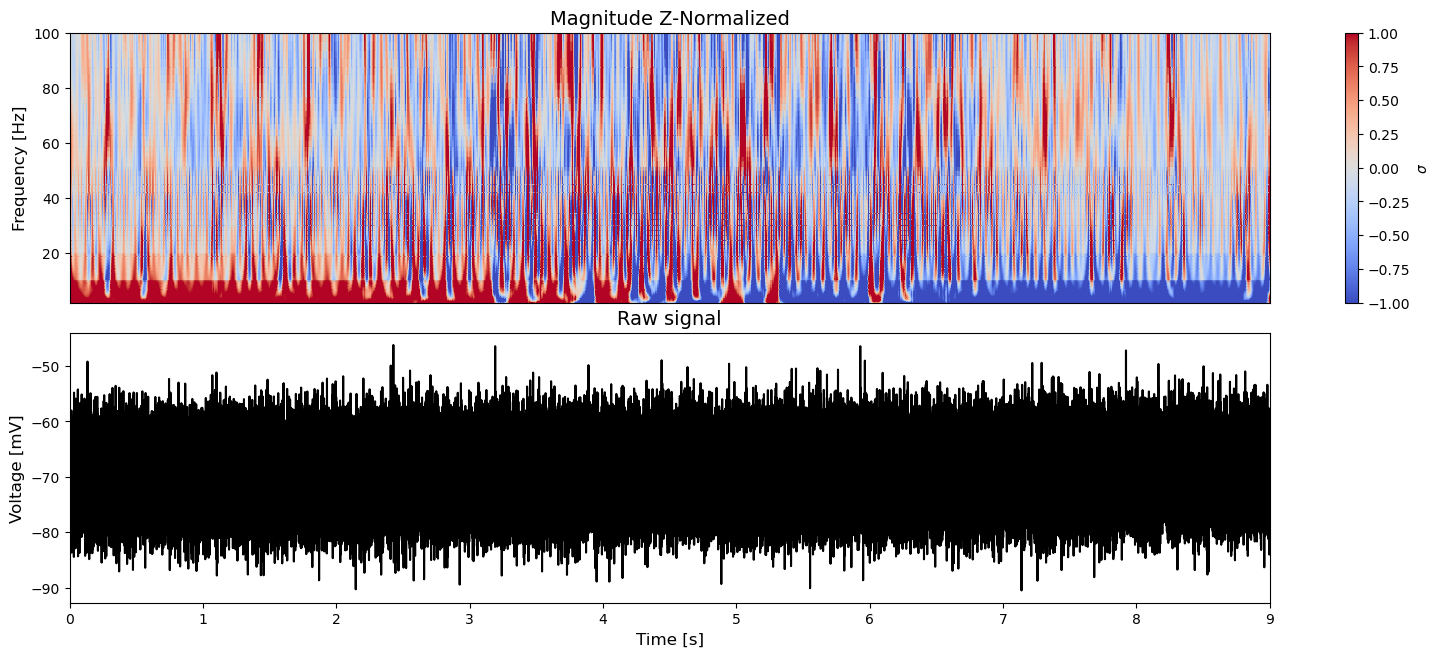

In [8]:
plt.figure(figsize=(15, 6))

ax = plt.axes([0.1, 0.55, 1, 0.45])

ax.set_title("Magnitude Z-Normalized", fontsize = 14)

im = specshow(M_norm,  x_axis=None, y_axis='linear', x_coords=time, y_coords=freqs, 
              shading='gouraud', cmap="jet", snap = True, ax = ax)

plt.colorbar(im, ax = ax, label = "$\sigma$")
im.set_cmap('coolwarm')
clim_range = 1
im.set_clim(-clim_range, clim_range)
ax.set_ylabel("Frequency [Hz]", fontsize = 12)
ax.set_xlim(time[0], time[-1]);

bx = plt.axes([0.1, 0.05, .8, 0.45])

bx.set_title("Raw signal", fontsize = 14)
bx.plot(time, signal, 'black')
bx.set_ylabel("Voltage [mV]", fontsize = 12)
bx.set_xlim(time[0], time[-1]);

plt.xlabel("Time [s]", fontsize = 12)
plt.show()